In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bnb_ticker = yf.Ticker("BNB-USD")
csv_file = "bnb.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Binance Coin
bnb = bnb_ticker.history(period="max")
bnb.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
bnb = pd.read_csv(csv_file, index_col=0)
bnb

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.0,0.0
2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.0,0.0
2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.0,0.0
2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.0,0.0
2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,603.114197,609.050476,601.585938,607.802917,1471028668,0.0,0.0
2024-06-16 00:00:00+00:00,607.808472,611.197510,601.476929,610.054016,1428836675,0.0,0.0
2024-06-17 00:00:00+00:00,610.073669,611.944031,592.426147,604.467346,1797626078,0.0,0.0


<Axes: xlabel='Date'>

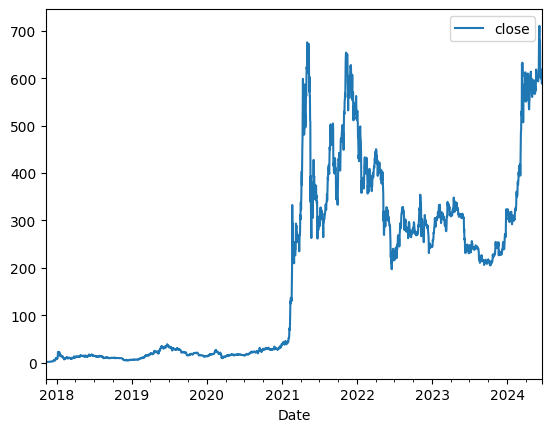

In [3]:
# Convert index to datetime
bnb.index = pd.to_datetime(bnb.index)

# Remove unnecessary columns
del bnb["Dividends"]
del bnb["Stock Splits"]

# Convert column names to lowercase
bnb.columns = [c.lower() for c in bnb.columns]

# Plot the closing price
bnb.plot.line(y="close", use_index=True)

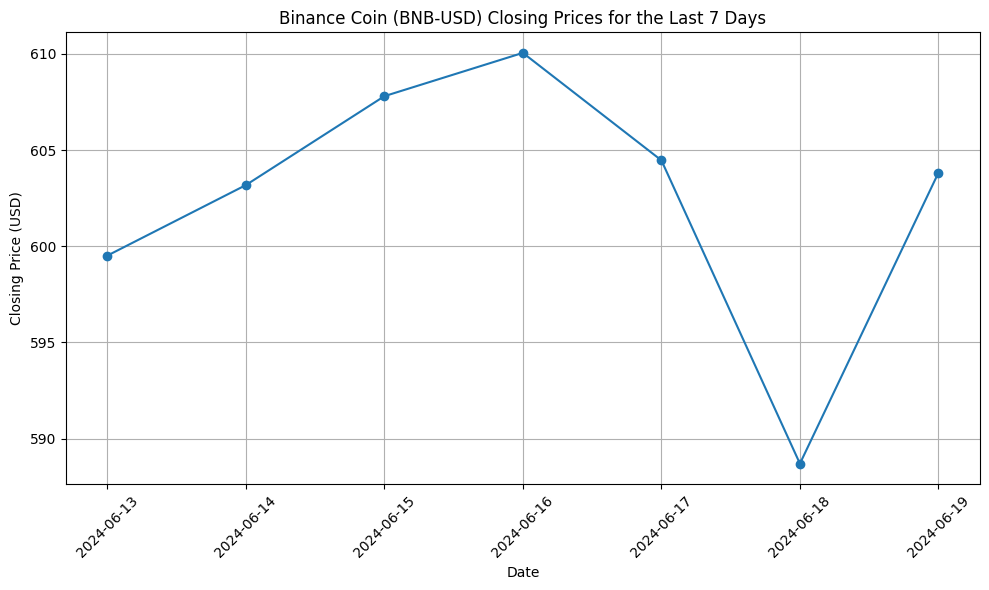

In [4]:
# Filter the data for the last seven days
last_seven_days_bnb = bnb[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_bnb.index, last_seven_days_bnb['close'], marker='o')
plt.title('Binance Coin (BNB-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("binance_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.000000,0.000000,0.000000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-15,0.233333,-0.056096,0.094444
2024-06-16,0.233333,-0.056096,0.094444
2024-06-17,0.233333,-0.056096,0.094444
2024-06-18,0.166667,-0.055640,0.077778


In [6]:
# Assuming 'btc' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
bnb = bnb.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
bnb["tomorrow"] = bnb["close"].shift(-1)
bnb["target"] = (bnb["tomorrow"] > bnb["close"]).astype(int)
bnb["target"].value_counts()


target
1    1254
0    1161
Name: count, dtype: int64

In [7]:
bnb

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.000000,0.000000,0.000000,1.796840,0
2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.000000,0.000000,0.000000,1.670470,0
2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.000000,0.000000,0.000000,1.519690,0
2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.000000,0.000000,0.000000,1.686620,1
2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.000000,0.000000,0.000000,1.592580,0
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,603.114197,609.050476,601.585938,607.802917,1471028668,0.233333,-0.056096,0.094444,610.054016,1
2024-06-16 00:00:00+00:00,607.808472,611.197510,601.476929,610.054016,1428836675,0.233333,-0.056096,0.094444,604.467346,0
2024-06-17 00:00:00+00:00,610.073669,611.944031,592.426147,604.467346,1797626078,0.233333,-0.056096,0.094444,588.702087,0
2024-06-18 00:00:00+00:00,604.332886,604.652832,575.761719,588.702087,2265505402,0.166667,-0.055640,0.077778,603.822388,1


In [8]:
bnb.to_csv('bnbSentimet.csv')